In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate
import sympy
from matplotlib.font_manager import FontProperties
import time
print(f"versions\nnumpy:\t{np.__version__}\nscipy:\t{
      sp.__version__}\nmatplotlib:\t{matplotlib.__version__}\nsympy:\t{sympy.__version__}")
sympy.init_printing()
# 设置全局字体为微软雅黑
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

versions
numpy:	1.26.4
scipy:	1.12.0
matplotlib:	3.8.3
sympy:	1.12


In [2]:
# 常微分方程数值求解方法
## 基于微分方程的数值求解方法
### 前向欧拉法
def forward_euler(f, y0: float, x0: float, x_end: float, h:float):
    """
    前向欧拉法求解常微分方程
    Params:
        f: 函数 f(x, y)，表示微分方程 y' = f(x, y)
        y0: 初始条件 y(t0) = y0
        t0: 初始条件
        x_end: 终止点
        h: 步长
    Return:
        x: 自变量数组
        y: 数值解数组
    """
    x = np.arange(x0, x_end + h, h)
    y = np.zeros(len(x))
    y[0] = y0

    for i in range(1, len(x)):
        # 前向欧拉法公式
        y[i] = y[i-1] + h * f(x[i-1], y[i-1])

    return x, y

In [3]:
# 后退欧拉法
from scipy.optimize import fsolve
def backward_euler(f, y0, x0, x_end, h):
    """
    后退欧拉法求解常微分方程
    Params:
        f: 函数 f(x, y)，表示微分方程 y' = f(x, y)
        y0: 初始条件 y(x0) = y0
        x0: 初始点x0
        x_end: 终止点
        h: 步长
    Return:
        x: 自变量数组
        y: 数值解数组
    """
    x = np.arange(x0, x_end + h, h)
    y = np.zeros(len(x))
    y[0] = y0

    for i in range(1, len(x)):
        # 定义隐式方程
        yi = lambda yi: yi - y[i-1] - h * f(x[i], yi)
        # 求解 yi)= 0
        y[i] = fsolve(yi, y[i-1])

    return x, y

In [4]:
### 预测-校正方法
def euler_predict_correct(f, y0, x0, x_end, h):
    """
    预测-校正方法求解常微分方程
    Params:
        f: 函数 f(x, y)，表示微分方程 y' = f(x, y)
        y0: 初始条件 y(x0) = y0
        x0: 初始点
        x_end: 终止点
        h: 步长
    Return:
        x: 自变量数组
        y: 数值解数组
    """
    x = np.arange(x0, x_end + h, h)
    y = np.zeros(len(x))
    y[0] = y0

    for i in range(1, len(x)):
        # 使用前向欧拉法进行预测
        y_predict = y[i-1] + h * f(x[i-1], y[i-1])
        # 最后使用后退欧拉法进行校正
        y[i] = y[i-1] + h* f(x[i], y_predict)

    return x, y

In [5]:
# 测试数据
def f(x, y):
    # 微分方程:y'=y
    # 解析解:y=exp(x)
    return y

y0 = 1
x0 = 0
x_end = 5
h = 0.1

C:\Users\24055\AppData\Local\Temp\ipykernel_87112\10490146.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = fsolve(yi, y[i-1])


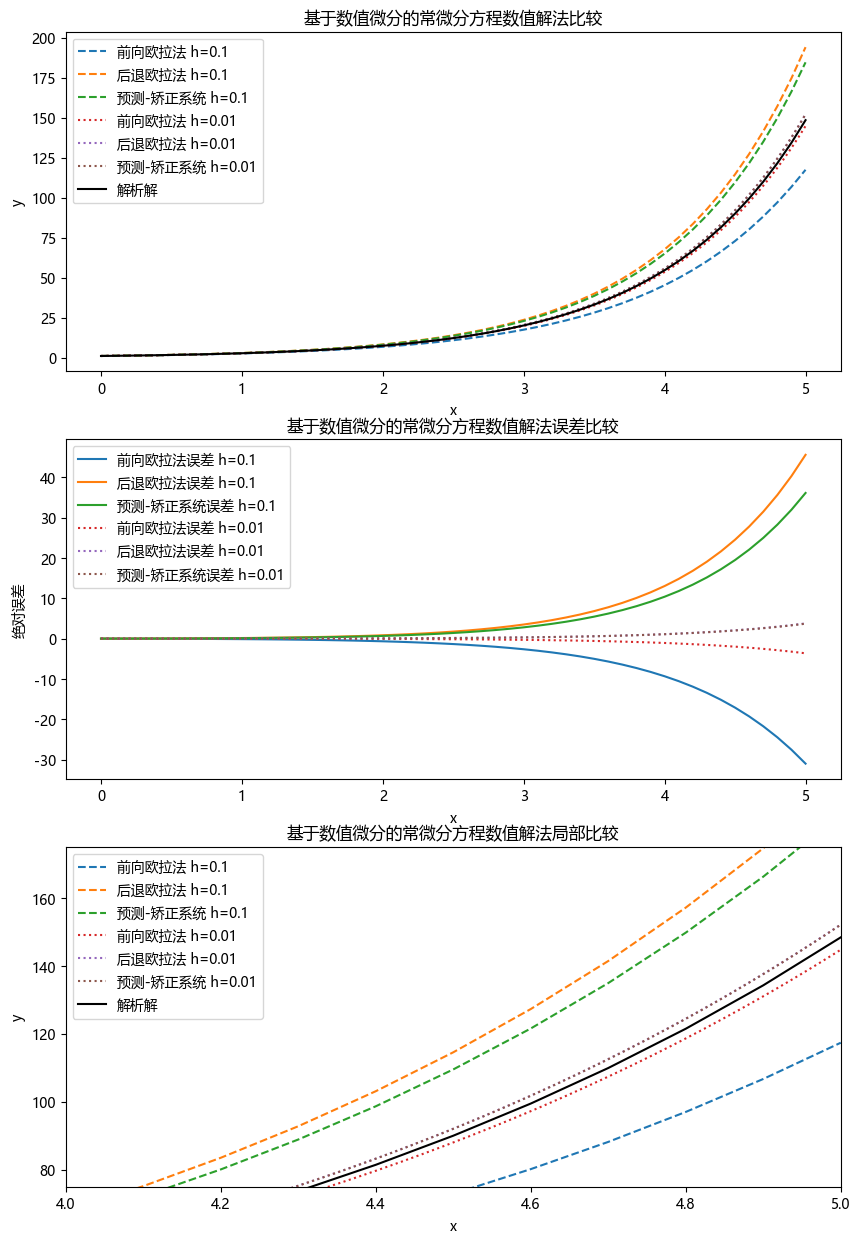

In [6]:

# 基于微分方程的数值求解
x1, y_forward_euler = forward_euler(f, y0, x0, x_end, h)
x1, y_bacKward_euler = backward_euler(f, y0, x0, x_end, h)
x1, y_predict = euler_predict_correct(f, y0, x0, x_end, h)
x1_1, y_forward_euler_1 = forward_euler(f, y0, x0, x_end, 0.01)
x1_1, y_bacKward_euler_1 = backward_euler(f, y0, x0, x_end, 0.01)
x1_1, y_predict_1 = euler_predict_correct(f, y0, x0, x_end, 0.01)
rectangle_predict_correct_time=time.time()
# 解析解
y_analytical = np.exp(x1)
y_analytical_1 = np.exp(x1_1)
# 绘图比较
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
axs[0].plot(x1, y_forward_euler, label='前向欧拉法 h=0.1', linestyle='--')
axs[0].plot(x1, y_bacKward_euler, label='后退欧拉法 h=0.1', linestyle='--')
axs[0].plot(x1, y_predict, label='预测-矫正系统 h=0.1', linestyle='--')
axs[0].plot(x1_1, y_forward_euler_1, label='前向欧拉法 h=0.01', linestyle=':')
axs[0].plot(x1_1, y_bacKward_euler_1, label='后退欧拉法 h=0.01', linestyle=':')
axs[0].plot(x1_1, y_predict_1, label='预测-矫正系统 h=0.01', linestyle=':')
axs[0].plot(x1, y_analytical, label='解析解',color='blacK')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].legend()
axs[0].set_title('基于数值微分的常微分方程数值解法比较')
axs[1].set_title('基于数值微分的常微分方程数值解法误差比较')
# 误差比较
axs[1].plot(x1, y_forward_euler-y_analytical, label='前向欧拉法误差 h=0.1')
axs[1].plot(x1, y_bacKward_euler-y_analytical, label='后退欧拉法误差 h=0.1')
axs[1].plot(x1, y_predict-y_analytical, label='预测-矫正系统误差 h=0.1')
axs[1].plot(x1_1, y_forward_euler_1-y_analytical_1,
            label='前向欧拉法误差 h=0.01', linestyle=':')
axs[1].plot(x1_1, y_bacKward_euler_1-y_analytical_1,
            label='后退欧拉法误差 h=0.01', linestyle=':')
axs[1].plot(x1_1, y_predict_1-y_analytical_1,
            label='预测-矫正系统误差 h=0.01', linestyle=':')
axs[1].legend()
axs[1].set_xlabel('x')
axs[1].set_ylabel('绝对误差')

axs[2].plot(x1, y_forward_euler, label='前向欧拉法 h=0.1', linestyle='--')
axs[2].plot(x1, y_bacKward_euler, label='后退欧拉法 h=0.1', linestyle='--')
axs[2].plot(x1, y_predict, label='预测-矫正系统 h=0.1', linestyle='--')
axs[2].plot(x1_1, y_forward_euler_1, label='前向欧拉法 h=0.01', linestyle=':')
axs[2].plot(x1_1, y_bacKward_euler_1, label='后退欧拉法 h=0.01', linestyle=':')
axs[2].plot(x1_1, y_predict_1, label='预测-矫正系统 h=0.01', linestyle=':')
axs[2].plot(x1, y_analytical, label='解析解', color='blacK')
axs[2].set_title('基于数值微分的常微分方程数值解法局部比较')
axs[2].set_xlim(4, 5)
axs[2].set_ylim(75, 175)
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].legend()

In [7]:
## 基于积分的数值求解方法
### 梯形法
def trapezoidal_method(f, y0, x0, x_end, h):
    """
    梯形法求解常微分方程
    Params:
        f: 函数 f(x, y)，表示微分方程 y' = f(x, y)
        y0: 初始条件 y(x0) = y0
        x0: 初始点
        x_end: 终止点
        h: 步长
    Return:
        x: 自变量数组
        y: 数值解数组
    """
    x = np.arange(x0, x_end + h, h)
    y = np.zeros(len(x))
    y[0] = y0

    for i in range(1, len(x)):
        # 梯形法公式
        yi=lambda yi:yi-y[i-1]-0.5*h*(f(x[i-1],y[i-1])+f(x[i],yi))
        y[i]=fsolve(yi,y[i-1])
    return x, y

In [8]:
# 梯形法:预测-校正方法
def trapezoidal_predict_correct(f, y0, x0, x_end, h):
    """
    梯形法:预测-校正方法求解常微分方程
    Params:
        f: 函数 f(x, y)，表示微分方程 y' = f(x, y)
        y0: 初始条件 y(x0) = y0
        x0: 初始点
        x_end: 终止点
        h: 步长
    Return:
        x: 自变量数组
        y: 数值解数组
    """
    x = np.arange(x0, x_end + h, h)
    y = np.zeros(len(x))
    y_predict=np.zeros(len(x))
    y[0] = y0

    for i in range(1, len(x)):
        # 使用前向欧拉法进行预测
        y_predict[i] = y[i-1] + h * f(x[i-1], y[i-1])
        # 最后使用梯形法进行校正
        y[i] = y[i-1] +0.5*h* (f(x[i-1], y[i-1]) + f(x[i], y_predict[i]))

    return x, y, y_predict

In [9]:
# Simpson公式
def simpson_method(f, y0, x0, x_end, h):
    """
    Simpson公式求解常微分方程
    Params:
        f: 函数 f(x, y)，表示微分方程 y' = f(x, y)
        y0: 初始条件 y(x0) = y0,y(x1)=y1
        x0: 初始点,初始点为[x0,x1]
        x_end: 终止点
        h: 步长
    Return:
        x: 自变量数组
        y: 数值解数组
    """
    #Simpson是两步公式，因此需要两个初始值
    assert len(x0)==2
    assert len(y0)==2
    h1=h/2
    x = np.arange(x0[0], x_end + h, h1)
    y = np.zeros(len(x))
    y[:2] = y0
    for i in range(2, len(x)):
        # Simpson公式
        g=lambda yi:yi-y[i-2]-h1/3*(f(x[i-2],y[i-2])+4*f(x[i-1],y[i-1])+f(x[i],yi))
        y[i] = fsolve(g, y[i-1])
    return x, y

C:\Users\24055\AppData\Local\Temp\ipykernel_87112\3159165608.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i]=fsolve(yi,y[i-1])
C:\Users\24055\AppData\Local\Temp\ipykernel_87112\4045658111.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = fsolve(g, y[i-1])


Text(0, 0.5, 'y')

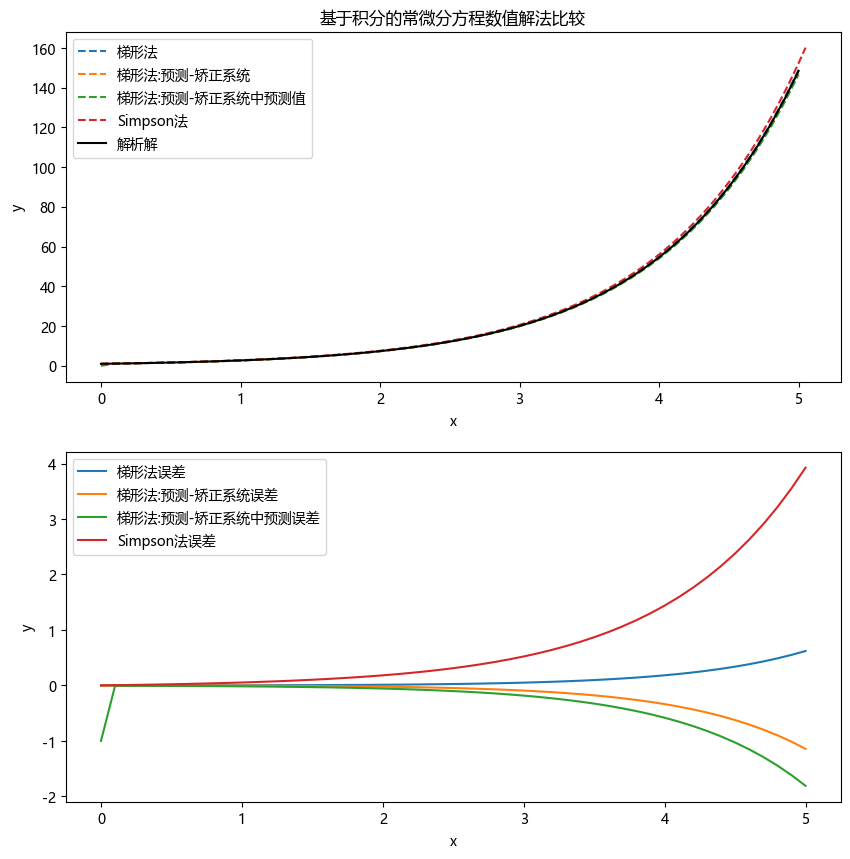

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
# 梯形法求解
x1, y_thrapezoidal_method = trapezoidal_method(f, y0, x0, x_end, h)
x1, y_trapezoidal_predict_correct, y_trapezoidal_predict_correct_predict = trapezoidal_predict_correct(f, y0, x0, x_end, h)
x2=np.array([0,0.1])
y2=np.exp(x2)
x_simpson_method, y_simpson_method = simpson_method(f, y2, x2, x_end, h)
# 解析解
y_analytical = np.exp(x1)

axs[0].plot(x1, y_thrapezoidal_method, label='梯形法', linestyle='--')
axs[0].plot(x1, y_trapezoidal_predict_correct, label='梯形法:预测-矫正系统', linestyle='--')
axs[0].plot(x1, y_trapezoidal_predict_correct_predict,
            label='梯形法:预测-矫正系统中预测值', linestyle='--')
axs[0].plot(x_simpson_method, y_simpson_method,
            label='Simpson法', linestyle='--')
axs[0].plot(x1, y_analytical, label='解析解', color='blacK')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].legend()
axs[0].set_title('基于积分的常微分方程数值解法比较')

# 误差比较
axs[1].plot(x1, y_thrapezoidal_method-y_analytical, label='梯形法误差')
axs[1].plot(x1, y_trapezoidal_predict_correct-y_analytical, label='梯形法:预测-矫正系统误差')
axs[1].plot(x1, y_trapezoidal_predict_correct_predict -
            y_analytical, label='梯形法:预测-矫正系统中预测误差')
axs[1].plot(x_simpson_method[::2], y_simpson_method[::2] -
            y_analytical, label='Simpson法误差')
axs[1].legend()
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

In [11]:
# 四阶Runge-Kutta 法
def Runge_Kutta(f, y0, x0, x_end, h):
    """
    四阶Runge-Kutta法求解常微分方程
    Params:
        f: 函数 f(x, y)，表示微分方程 y' = f(x, y)
        y0: 初始条件 y(x0) = y0
        x0: 初始点
        x_end: 终止点
        h: 步长
    Return:
        x: 自变量数组
        y: 数值解数组
    """
    x = np.arange(x0, x_end + h, h)
    y = np.zeros(len(x))
    y[0] = y0

    for i in range(1, len(x)):
        K1 = f(x[i-1], y[i-1])
        K2 = f(x[i-1] + h*0.5, y[i-1] + h*0.5 * K1)
        K3 = f(x[i-1] + h*0.5, y[i-1] + h*0.5 * K2)
        K4 = f(x[i-1] + h, y[i-1] + h * K3)
        y[i] = y[i-1] + h/6 * (K1 + 2*K2 + 2*K3 + K4)
    return x, y

Text(0.5, 1.0, '基于积分的常微分方程数值解法误差比较')

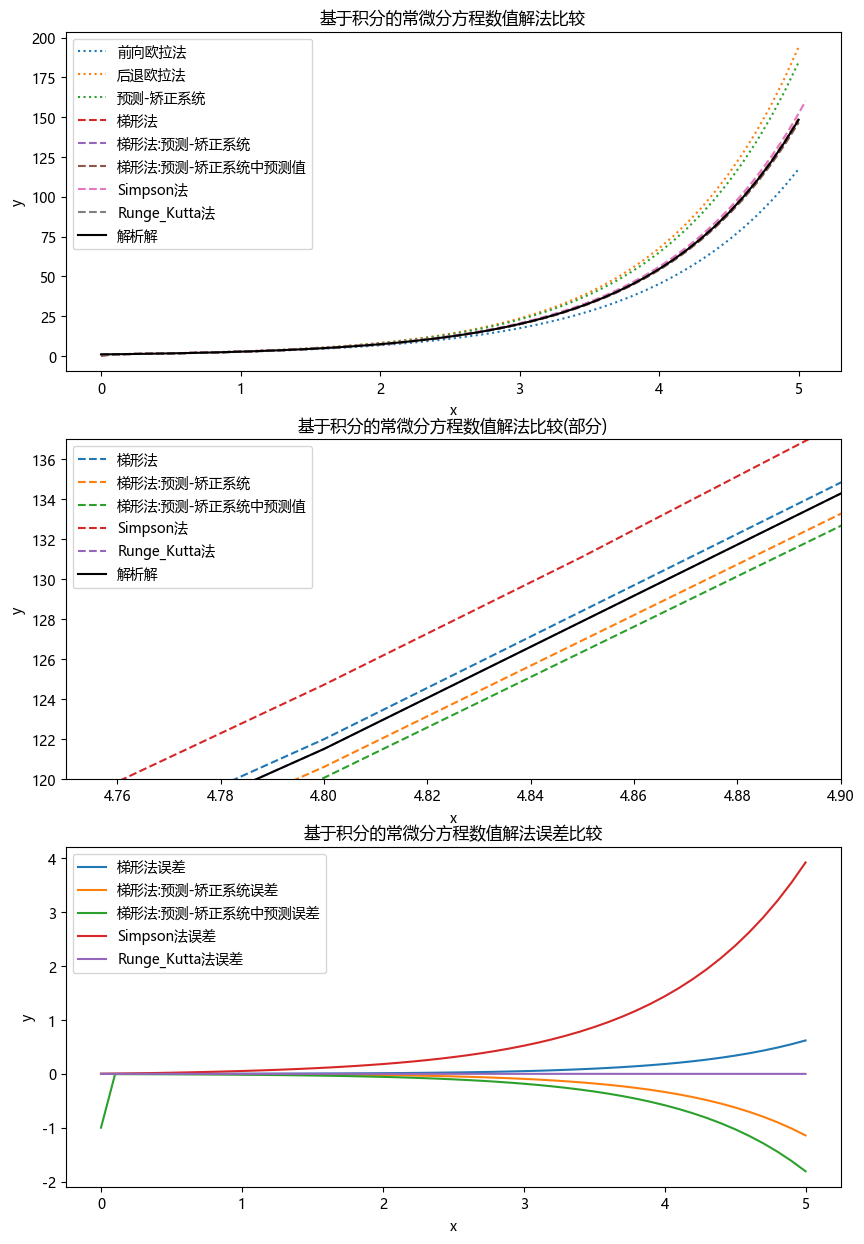

In [12]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
x0,y_runge_Kutta=Runge_Kutta(f,y0,x0,x_end,h)

axs[0].plot(x1, y_forward_euler, label='前向欧拉法', linestyle=':')
axs[0].plot(x1, y_bacKward_euler, label='后退欧拉法', linestyle=':')
axs[0].plot(x1, y_predict, label='预测-矫正系统', linestyle=':')
axs[0].plot(x0, y_thrapezoidal_method, label='梯形法', linestyle='--')
axs[0].plot(x0, y_trapezoidal_predict_correct,
            label='梯形法:预测-矫正系统', linestyle='--')
axs[0].plot(x0, y_trapezoidal_predict_correct_predict,
            label='梯形法:预测-矫正系统中预测值', linestyle='--')
axs[0].plot(x_simpson_method, y_simpson_method,
            label='Simpson法', linestyle='--')
axs[0].plot(x0, y_runge_Kutta, label='Runge_Kutta法', linestyle='--')
axs[0].plot(x0, y_analytical, label='解析解', color='blacK')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].legend()
axs[0].set_title('基于积分的常微分方程数值解法比较')

axs[1].plot(x0, y_thrapezoidal_method, label='梯形法', linestyle='--')
axs[1].plot(x0, y_trapezoidal_predict_correct,
            label='梯形法:预测-矫正系统', linestyle='--')
axs[1].plot(x0, y_trapezoidal_predict_correct_predict,
            label='梯形法:预测-矫正系统中预测值', linestyle='--')
axs[1].plot(x_simpson_method, y_simpson_method,
            label='Simpson法', linestyle='--')
axs[1].plot(x0, y_runge_Kutta, label='Runge_Kutta法', linestyle='--')
axs[1].plot(x0, y_analytical, label='解析解', color='blacK')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_xlim(4.75, 4.9)
axs[1].set_ylim(120,137)
axs[1].legend()
axs[1].set_title('基于积分的常微分方程数值解法比较(部分)')


# 误差比较
axs[2].plot(x0, y_thrapezoidal_method-y_analytical, label='梯形法误差')
axs[2].plot(x0, y_trapezoidal_predict_correct -
            y_analytical, label='梯形法:预测-矫正系统误差')
axs[2].plot(x0, y_trapezoidal_predict_correct_predict -
            y_analytical, label='梯形法:预测-矫正系统中预测误差')
axs[2].plot(x0, y_simpson_method[::2]-y_analytical, label='Simpson法误差')
axs[2].plot(x0, y_runge_Kutta-y_analytical, label='Runge_Kutta法误差')
axs[2].legend()
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('基于积分的常微分方程数值解法误差比较')

In [13]:
## 线性多步法
### Adams显式求解公式
def adams_explicit(f,y:np.ndarray,x:np.ndarray,x_end:int,h: float):
    """
    Adams显式求解公式求解常微分方程
    Params:
        f: 函数 f(x, y)，表示微分方程 y' = f(x, y)
        y: 数值解数组
        x: 自变量数组
        h: 步长
    Return:
        y: 数值解数组
    """
    # Adams显式求解公式需要前三个点
    assert len(y)==3
    assert len(x)==3
    x_steps=np.arange(x[0],x_end+h,h)
    steps=len(x_steps)
    y_adams_explicit=np.zeros(steps)
    y_adams_explicit[0:3]=y
    for i in range(3, len(x_steps)):
        # Adams显式求解公式
        y_adams_explicit[i] = y_adams_explicit[i-1]+h/12 * \
            (23*f(x_steps[i-1], y_adams_explicit[i-1])-16*f(x_steps[i-2], y_adams_explicit[i-2])+5*f(x_steps[i-3], y_adams_explicit[i-3]))
    return x_steps,y_adams_explicit

In [14]:
# Adams隐式求解公式
def adams_implicit(f, y: np.ndarray, x: np.ndarray, x_end: int, h: float):
    """
    Adams显式求解公式求解常微分方程
    Params:
        f: 函数 f(x, y)，表示微分方程 y' = f(x, y)
        y: 数值解数组
        x: 自变量数组
        h: 步长
    Return:
        y: 数值解数组
    """
    x_steps = np.arange(x[0], x_end+h, h)
    steps = len(x_steps)
    y_adams_implicit = np.zeros(steps)
    y_adams_implicit[0:3] = y
    for i in range(3, len(x_steps)):
        # Adams隐式求解公式
        yi=lambda yi:yi-y_adams_implicit[i-1]-h/24*(9*f(x_steps[i],yi)+19*f(x_steps[i-1],y_adams_implicit[i-1])-5*f(x_steps[i-2],y_adams_implicit[i-2])+f(x_steps[i-3],y_adams_implicit[i-3]))
        # 求解yi=0
        y_adams_implicit[i]=fsolve(yi,y_adams_implicit[i-1])
    return x_steps, y_adams_implicit

In [15]:
# Adams 预测矫正系统
def adams_predict_correct(f, y0: np.ndarray, x0: np.ndarray, x_end: int, h: float):
    """
    Adams显式求解公式求解常微分方程
    Params:
        f: 函数 f(x, y)，表示微分方程 y' = f(x, y)
        y: 数值解数组
        x: 自变量数组
        h: 步长
    Return:
        y: 数值解数组
    """
    x = np.arange(x0[0], x_end+h, h)
    steps = len(x)
    y = np.zeros(steps)
    y[0:3] = y0
    for i in range(3, len(x)):
        #预测
        y_predict= y[i-1]+h/24*(55*f(x[i-1],y[i-1])-59*f(x[i-2],y[i-2])+37*f(x[i-3],y[i-3])-9*f(x[i-4],y[i-4]))
        #矫正
        y[i] = y[i-1]+h/24*(9*f(x[i],y_predict)+19*f(x[i-1],y[i-1])-5*f(x[i-2],y[i-2])+f(x[i-3],y[i-3]))
    return x, y

In [16]:
def milne(f, y0: np.ndarray, x0: np.ndarray, x_end: int, h: float):
    """
    Milne求解常微分方程
    Params:
        f: 函数 f(x, y)，表示微分方程 y' = f(x, y)
        y: 数值解数组
        x: 自变量数组
        h: 步长
    Return:
        y: 数值解数组
    """
    x = np.arange(x0[0], x_end+h, h)
    steps = len(x)
    y = np.zeros(steps)
    y[0:4] = y0
    for i in range(4, len(x)):
        y[i] = y[i-4]+4*h/3*(2*f(x[i-1],y[i-1])-f(x[i-2],y[i-2])+2*f(x[i-3],y[i-3]))
    return x, y

In [17]:
def milne_predict_correct(f, y: np.ndarray, x: np.ndarray, x_end: int, h: float):
    """
    Milne预测矫正系统求解常微分方程
    Params:
        f: 函数 f(x, y)，表示微分方程 y' = f(x, y)
        y: 数值解数组
        x: 自变量数组
        h: 步长
    Return:
        y: 数值解数组
    """
    x_steps = np.arange(x[0], x_end+h, h)
    steps = len(x_steps)
    y_milne_predict_correct = np.zeros(steps)
    y_milne_predict_correct[0:4] = y
    for i in range(4, len(x_steps)):
        y_predict = y_milne_predict_correct[i-4]+4*h/3*(2*f(x_steps[i-1],y_milne_predict_correct[i-1])-f(x_steps[i-2],y_milne_predict_correct[i-2])+2*f(x_steps[i-3],y_milne_predict_correct[i-3]))
        y_milne_predict_correct[i] = y_milne_predict_correct[i-2]+h/3*(f(x_steps[i],y_predict)+4*f(x_steps[i-1],y_milne_predict_correct[i-1])+f(x_steps[i-2],y_milne_predict_correct[i-2]))
    return x_steps, y_milne_predict_correct

C:\Users\24055\AppData\Local\Temp\ipykernel_87112\1044173652.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_adams_implicit[i]=fsolve(yi,y_adams_implicit[i-1])


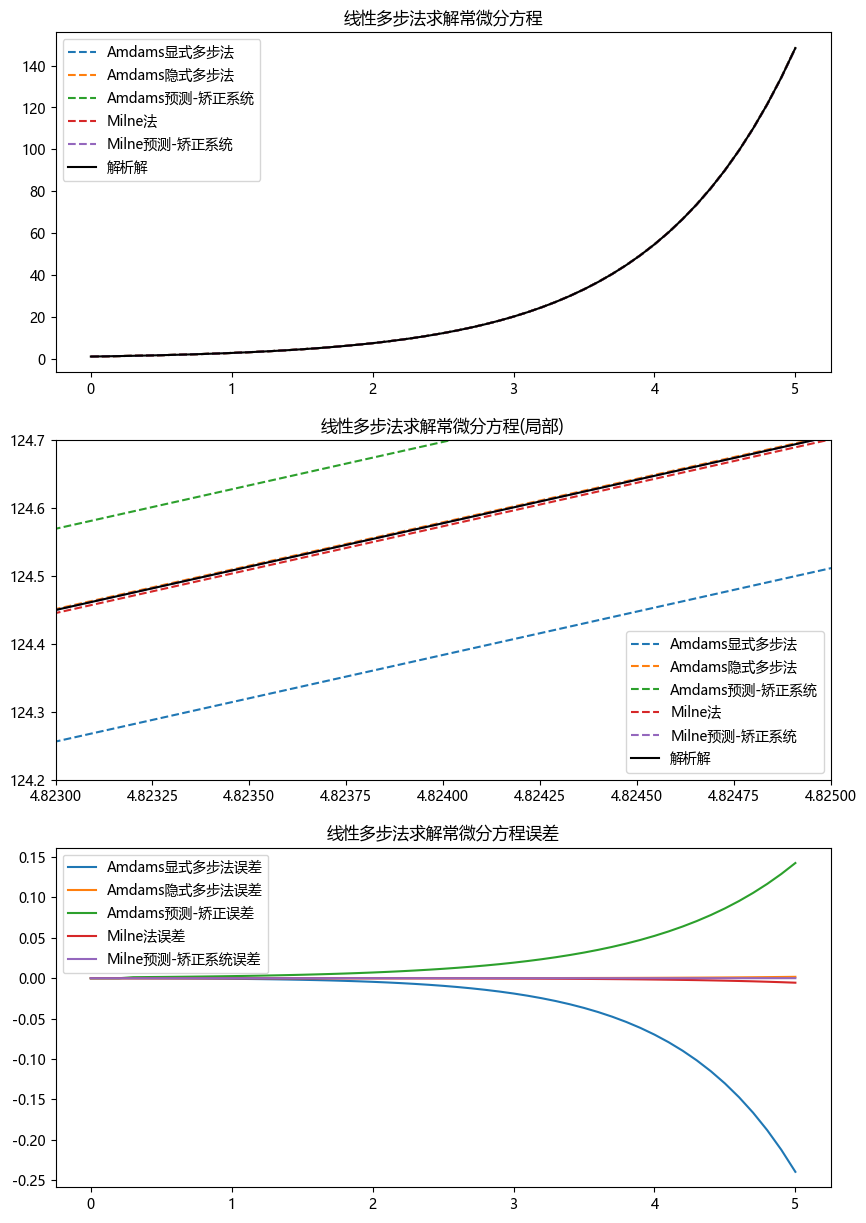

In [18]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
# axs[0].plot(x1, y_forward_euler, label='前向欧拉法', linestyle='--')
# axs[0].plot(x1, y_bacKward_euler, label='后退欧拉法', linestyle='--')
# axs[0].plot(x1, y_predict, label='预测-矫正系统', linestyle='--')
x1 = np.array([0, 0.1, 0.2])
y1 = np.exp(x1)
x2=np.array([0, 0.1,0.2,0.3])
y2=np.exp(x2)
x0, y_adams_explicit = adams_explicit(f, y1, x1, x_end, h)
x0,y_adams_implicit=adams_implicit(f,y1,x1,x_end,h)
x0, y0=adams_predict_correct(f,y1,x1,x_end,h)
x0,y=milne(f,y2,x2,x_end,h)
x0,y_milne_predict_correct=milne_predict_correct(f,y2,x2,x_end,h)
axs[0].set_title('线性多步法求解常微分方程')
axs[0].plot(x0, y_adams_explicit, label='Amdams显式多步法', linestyle='--')
axs[0].plot(x0, y_adams_implicit, label='Amdams隐式多步法', linestyle='--')
axs[0].plot(x0, y0, label='Amdams预测-矫正系统', linestyle='--')
axs[0].plot(x0,y,label='Milne法',linestyle='--')
axs[0].plot(x0,y_milne_predict_correct,label='Milne预测-矫正系统',linestyle='--')
axs[0].plot(x0, y_analytical, label='解析解', color='blacK')
axs[0].legend()

axs[1].set_title('线性多步法求解常微分方程(局部)')
axs[1].plot(x0, y_adams_explicit, label='Amdams显式多步法', linestyle='--')
axs[1].plot(x0, y_adams_implicit, label='Amdams隐式多步法', linestyle='--')
axs[1].plot(x0, y0, label='Amdams预测-矫正系统', linestyle='--')
axs[1].plot(x0, y, label='Milne法', linestyle='--')
axs[1].plot(x0, y_milne_predict_correct, label='Milne预测-矫正系统', linestyle='--')
axs[1].plot(x0, y_analytical, label='解析解', color='blacK')
axs[1].set_xlim(4.823, 4.825)
axs[1].set_ylim(124.2,124.7)
axs[1].legend()

axs[2].set_title('线性多步法求解常微分方程误差')
axs[2].plot(x0, y_adams_explicit-y_analytical, label='Amdams显式多步法误差')
axs[2].plot(x0, y_adams_implicit-y_analytical, label='Amdams隐式多步法误差')
axs[2].plot(x0, y0-y_analytical, label='Amdams预测-矫正误差')
axs[2].plot(x0,y-y_analytical,label='Milne法误差')
axs[2].plot(x0,y_milne_predict_correct-y_analytical,label='Milne预测-矫正系统误差')
axs[2].legend()